In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('manager_survey_data.csv')

In [4]:
df

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3
...,...,...,...
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3


In [5]:
df.columns

Index(['EmployeeID', 'JobInvolvement', 'PerformanceRating'], dtype='object')

In [6]:
df.shape

(4410, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [8]:
df.describe()

,EmployeeID,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.729932,3.153741
std,1273.201673,0.711400,0.360742
min,1.000000,1.000000,3.000000
25%,1103.250000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000
75%,3307.750000,3.000000,3.000000
max,4410.000000,4.000000,4.000000


In [9]:
df.isnull().sum()

EmployeeID           0
JobInvolvement       0
PerformanceRating    0
dtype: int64

In [12]:
df.isnull().values.any()

False

In [13]:
df.head()

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [15]:
df['PerformanceRating'].value_counts()

3    3732
4     678
Name: PerformanceRating, dtype: int64

C:\Users\Eswari\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

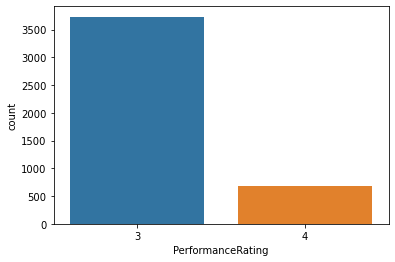

In [16]:
sns.countplot(df['PerformanceRating'])

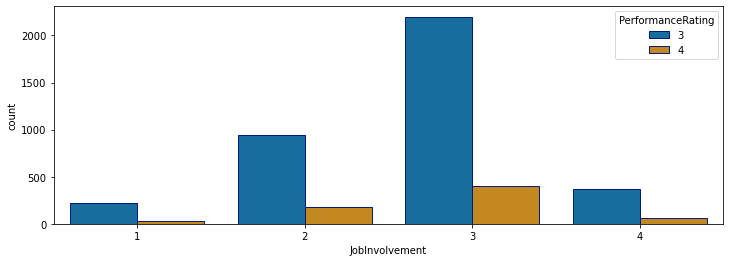

In [17]:
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x='JobInvolvement', hue='PerformanceRating', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

In [18]:
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())

In [19]:
df.corr()

,EmployeeID,JobInvolvement,PerformanceRating
EmployeeID,1.000000,0.008591,-0.006892
JobInvolvement,0.008591,1.000000,0.010699
PerformanceRating,-0.006892,0.010699,1.000000


In [20]:
df.cov()

,EmployeeID,JobInvolvement,PerformanceRating
EmployeeID,1.621042e+06,7.781016,-3.165344
JobInvolvement,7.781016e+00,0.506090,0.002746
PerformanceRating,-3.165344e+00,0.002746,0.130135


<AxesSubplot:>

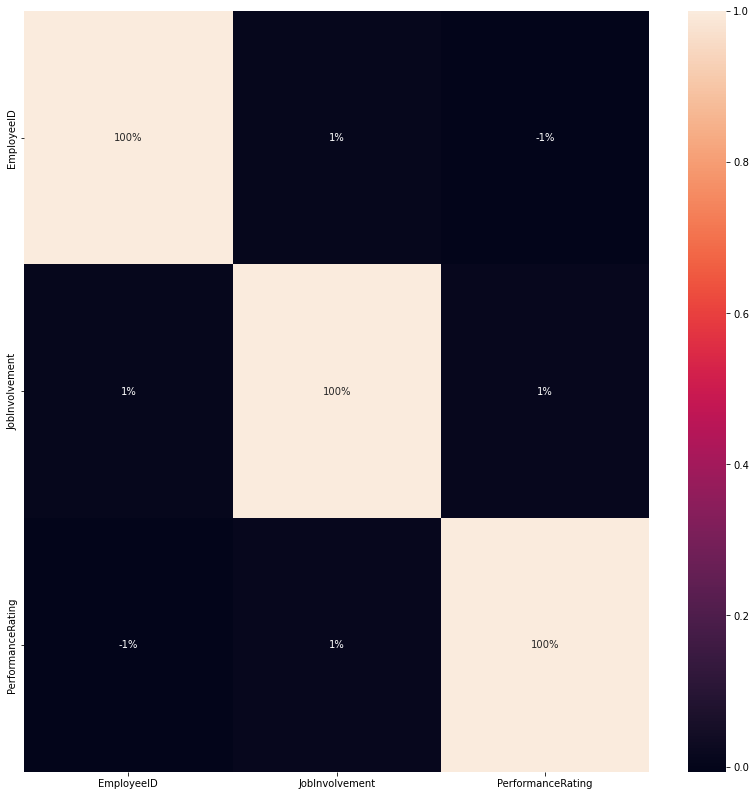

In [21]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [142]:
X = df.iloc[:, 0:1].values
y = df.iloc[:, 1]

In [143]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state =1) 

In [144]:
from sklearn.tree import DecisionTreeClassifier

tree_classifier = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree_classifier.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [149]:
pred = tree_classifier.score(X_train,y_train)

In [150]:
pred

0.6132446325975204

In [151]:
y_tree_pred = tree_classifier.predict(X_test)

In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_tree_pred)

In [153]:
acc

0.5775158658204895

In [154]:
from sklearn.metrics import confusion_matrix
cm_dt=confusion_matrix(y_test,y_tree_pred)